In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target  # Add target column

# Features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga'],  # Suitable solvers
}

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=5000, random_state=2)

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid,
                                   n_iter=10, cv=5, scoring='accuracy', random_state=2, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters and accuracy
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Predict using best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Parameters:", best_params)
print("Test Set Accuracy:", accuracy)

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", np.mean(scores))


Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': np.float64(1.623776739188721)}
Test Set Accuracy: 1.0
Cross-validation accuracy: 0.9733333333333334


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target  # Add target column

# Features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize One-vs-One Logistic Regression
model = OneVsOneClassifier(LogisticRegression(solver='liblinear', random_state=2))

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("One-vs-One (OvO) Logistic Regression Accuracy:", accuracy)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", np.mean(scores))


One-vs-One (OvO) Logistic Regression Accuracy: 1.0
Cross-validation accuracy: 0.9800000000000001


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



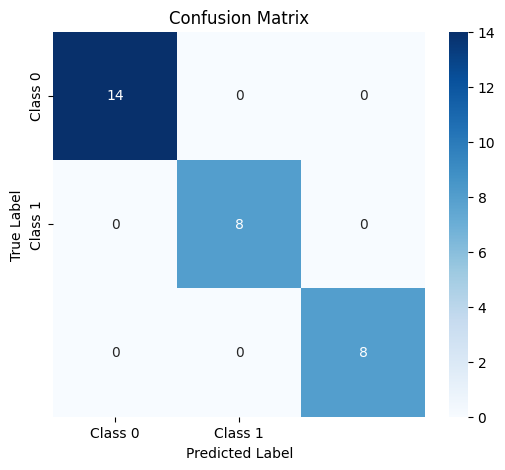

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target  # Add target column

# Convert to binary classification (Class 0 vs Class 1)
df = df[df['Target'] != 2]  # Remove class 2
X = df.drop(columns=['Target'])
y = df['Target']

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize and train Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=2)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



===== Logistic Regression WITHOUT Class Weights =====
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       892
           1       0.73      0.50      0.59       108

    accuracy                           0.93      1000
   macro avg       0.84      0.74      0.78      1000
weighted avg       0.92      0.93      0.92      1000


===== Logistic Regression WITH Balanced Class Weights =====
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       892
           1       0.38      0.84      0.53       108

    accuracy                           0.84      1000
   macro avg       0.68      0.84      0.71      1000
weighted avg       0.91      0.84      0.86      1000



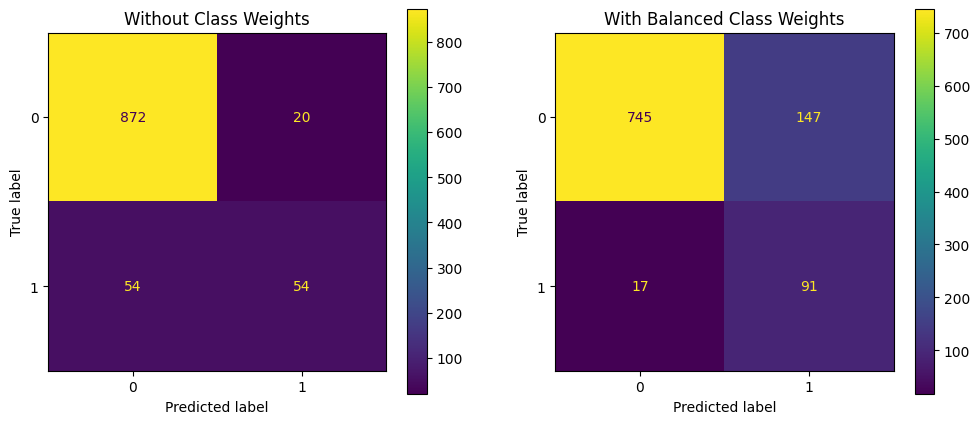

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# Step 1: Generate an imbalanced dataset
X, y = make_classification(n_samples=5000, n_features=10, n_classes=2,
                           weights=[0.90, 0.10], random_state=42)  # 90% class 0, 10% class 1

# Step 2: Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Step 3: Train Logistic Regression (without class weight)
model_unbalanced = LogisticRegression(solver='liblinear', random_state=42)
model_unbalanced.fit(X_train, y_train)
y_pred_unbalanced = model_unbalanced.predict(X_test)

# Step 4: Train Logistic Regression (with class weight='balanced')
model_balanced = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=2)
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)

# Step 5: Evaluate models
print("===== Logistic Regression WITHOUT Class Weights =====")
print(classification_report(y_test, y_pred_unbalanced))

print("\n===== Logistic Regression WITH Balanced Class Weights =====")
print(classification_report(y_test, y_pred_balanced))

# Step 6: Visualize Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Unbalanced model confusion matrix
ConfusionMatrixDisplay.from_estimator(model_unbalanced, X_test, y_test, ax=axes[0])
axes[0].set_title("Without Class Weights")

# Balanced model confusion matrix
ConfusionMatrixDisplay.from_estimator(model_balanced, X_test, y_test, ax=axes[1])
axes[1].set_title("With Balanced Class Weights")

plt.show()


===== Model Performance =====
Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



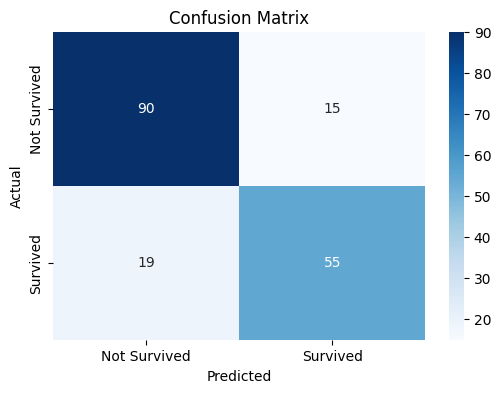

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Step 2: Data Preprocessing
# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fix for Age
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fix for Embarked
 # Fill missing Embarked with mode

# Convert categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Encode Sex
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # One-hot encode 'Embarked'

# Step 3: Split data into train & test sets
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression model
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
print("===== Model Performance =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train without scaling
model_no_scaling = LogisticRegression(max_iter=500, random_state=2)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# Apply standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train with scaling
model_scaled = LogisticRegression(max_iter=500, random_state=2)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Compare results
print("Accuracy without scaling:", accuracy_no_scaling)
print("Accuracy with scaling:", accuracy_scaled)


Accuracy without scaling: 0.9666666666666667
Accuracy with scaling: 0.9666666666666667


In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

# Generate binary classification data
X, y = make_classification(n_samples=1000, n_features=10, random_state=2)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train model
model = LogisticRegression(max_iter=500, random_state=2)
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", auc_score)


ROC-AUC Score: 0.9362705740666399


In [54]:
model = LogisticRegression(C=0.5, max_iter=500, random_state=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with C=0.5:", accuracy)


Accuracy with C=0.5: 0.88


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


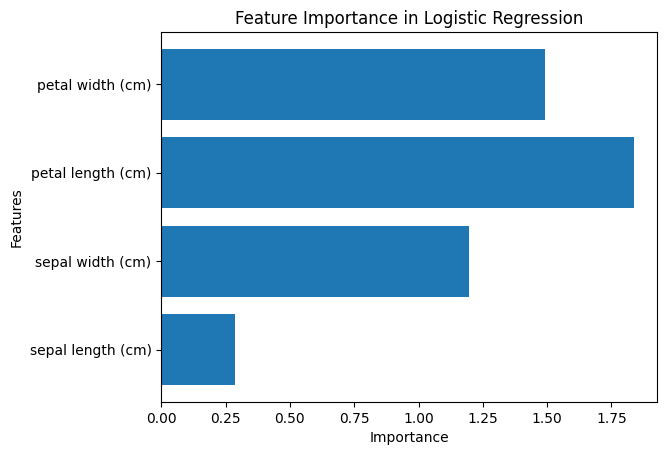

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train model
model = LogisticRegression(max_iter=500, random_state=2, multi_class='ovr')
model.fit(X_train, y_train)

# Get absolute mean importance of features
feature_importance = np.mean(np.abs(model.coef_), axis=0)  # Take mean across classes if multiclass

# Plot feature importance
plt.barh(iris.feature_names, feature_importance)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Logistic Regression")
plt.show()


In [56]:
from sklearn.metrics import cohen_kappa_score

# Train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute Cohen's Kappa Score
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Cohen’s Kappa Score:", kappa_score)


Cohen’s Kappa Score: 0.8958333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


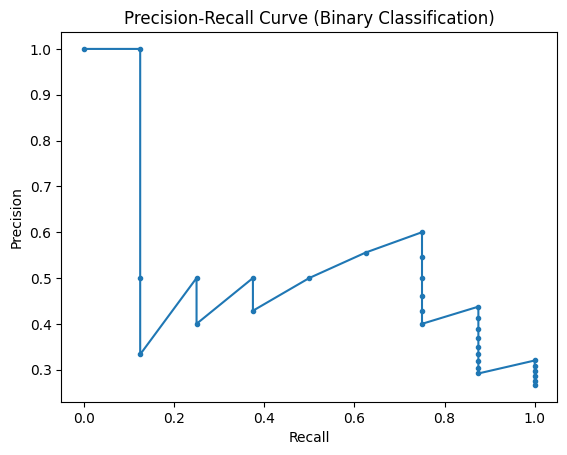

In [57]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert to binary classification: Set class 1 as positive, others as negative
y_binary = (y == 1).astype(int)  # Converts class 1 into 1, and others into 0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=2)

# Train Logistic Regression
model = LogisticRegression(max_iter=500, random_state=2)
model.fit(X_train, y_train)

# Predict probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Binary Classification)')
plt.show()


In [58]:
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=500, random_state=2)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Solver: {solver}, Accuracy: {accuracy}")


Solver: liblinear, Accuracy: 0.7
Solver: saga, Accuracy: 0.7333333333333333
Solver: lbfgs, Accuracy: 0.7333333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [59]:
from sklearn.metrics import matthews_corrcoef

# Train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute MCC
mcc_score = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (MCC):", mcc_score)


Matthews Correlation Coefficient (MCC): 0.26382242650554316


In [60]:
# Without Scaling
model_no_scaling.fit(X_train, y_train)
accuracy_no_scaling = accuracy_score(y_test, model_no_scaling.predict(X_test))

# With Scaling
model_scaled.fit(X_train_scaled, y_train)
accuracy_scaled = accuracy_score(y_test, model_scaled.predict(X_test_scaled))

print("Accuracy without scaling:", accuracy_no_scaling)
print("Accuracy with scaling:", accuracy_scaled)


Accuracy without scaling: 0.7333333333333333
Accuracy with scaling: 0.7666666666666667


In [61]:
from sklearn.model_selection import cross_val_score

C_values = np.logspace(-4, 4, 10)
best_C = None
best_score = 0

for C in C_values:
    model = LogisticRegression(C=C, max_iter=500, random_state=2)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    print(f"C={C}, Mean Accuracy={mean_score}")

    if mean_score > best_score:
        best_score = mean_score
        best_C = C

print(f"Best C: {best_C}, Best Accuracy: {best_score}")


C=0.0001, Mean Accuracy=0.65
C=0.000774263682681127, Mean Accuracy=0.65
C=0.005994842503189409, Mean Accuracy=0.65
C=0.046415888336127774, Mean Accuracy=0.65
C=0.3593813663804626, Mean Accuracy=0.7
C=2.782559402207126, Mean Accuracy=0.7083333333333333
C=21.54434690031882, Mean Accuracy=0.7333333333333334
C=166.81005372000558, Mean Accuracy=0.75
C=1291.5496650148827, Mean Accuracy=0.75
C=10000.0, Mean Accuracy=0.75
Best C: 166.81005372000558, Best Accuracy: 0.75


In [62]:
import joblib

# Train model
model = LogisticRegression(max_iter=500, random_state=2)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'logistic_regression_model.pkl')

# Load the model
loaded_model = joblib.load('logistic_regression_model.pkl')

# Make predictions with loaded model
y_pred_loaded = loaded_model.predict(X_test)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)

print("Loaded Model Accuracy:", accuracy_loaded)


Loaded Model Accuracy: 0.7333333333333333
